<a href="https://colab.research.google.com/github/seorinchoi/homework/blob/main/SVM_%EC%B5%9C%EC%84%9C%EB%A6%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import datasets

iris = datasets.load_iris()
list(iris.keys())
#데이터셋 다운로드

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [ ]:
print(iris.DESCR)

#4개의 특성을 가지고 있고, 3개의 클래스로 분류되는 붓꽃 데이터셋.

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

#1.iris virginica와 나머지 붓꽃을 분리하는 SVM 모델 만들기
C값에 따라 어떻게 결정 경계가 그려지는지 확인한다.


In [ ]:
import numpy as np

X = iris['data'][:,(2,3)] #2~3인덱스. 꽃잎 길이와 꽃잎 너비의 데이터를 전부 가져온다
y = (iris['target']==2).astype(np.float64) #iris virginica

Text(0, 0.5, 'Petal width')

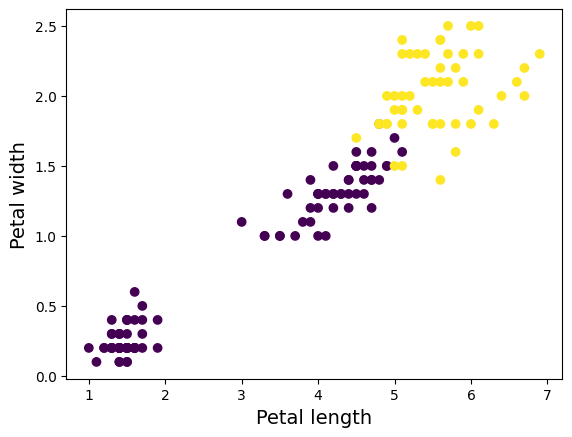

In [ ]:
import matplotlib.pyplot as plt

plt.figure()

plt.scatter(X[:,0], X[:,1], c=y) #모두 가져오는 중

plt.xlabel("Petal length", fontsize = 14)
plt.ylabel("Petal width", fontsize=14)
#표시한 코드가 제대로 나타나는지 확인


#C를 1로 설정했을 때

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42))
])

svm_clf.fit(X,y)

#C가 1일때

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge', random_state=42))])

In [ ]:
print(svm_clf.named_steps["linear_svc"].coef_) #가중치 벡터
print(svm_clf.named_steps["linear_svc"].intercept_) #bias
#훈련된 값이 저장된 것을 확인함
#이후 코드에서는 생략.

[[1.63328027 2.38786154]]
[-2.50520656]


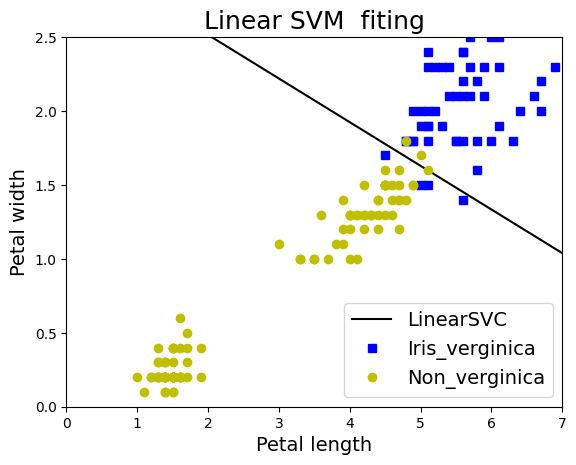

In [ ]:
def plot_svc_decision_boundary(svm_clf):
  #주어진 파이프라인을 받고 해당 설정값에 맞는 결정경계를 출력한다.
  w = svm_clf.named_steps["linear_svc"].coef_[0]
  b = svm_clf.named_steps["linear_svc"].intercept_[0]


  #결정경계에서 w0*x0 + wl*x1 +b = 0이다
  #->x1 = -w0/w1 * x0 - b/w1

  w_new = -w[0]/w[1]
  b_new = -b/w[1]


  line = svm_clf.named_steps["scaler"].inverse_transform([[-2,(-2*w_new)+b_new], [2, 2*w_new+b_new]])

  plt.plot(line [:,0], line[:,1],"k",label="LinearSVC")

plot_svc_decision_boundary(svm_clf)

plt.plot(X[:,0][y==1],X[:,1][y==1],"bs", label= "Iris_verginica")
plt.plot(X[:,0][y==0],X[:,1][y==0],"yo", label= "Non_verginica")
plt.xlabel("Petal length", fontsize = 14)
plt.ylabel("Petal width", fontsize=14)

plt.legend(loc="lower right", fontsize=14)
plt.title("Linear SVM  fiting", fontsize = 18)
plt.axis([0,7,0,2.5])

plt.show()

#C가 50일 때

In [ ]:
svm_clf50 = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=50, loss="hinge", random_state=42))
])

svm_clf50.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=50, loss='hinge', random_state=42))])

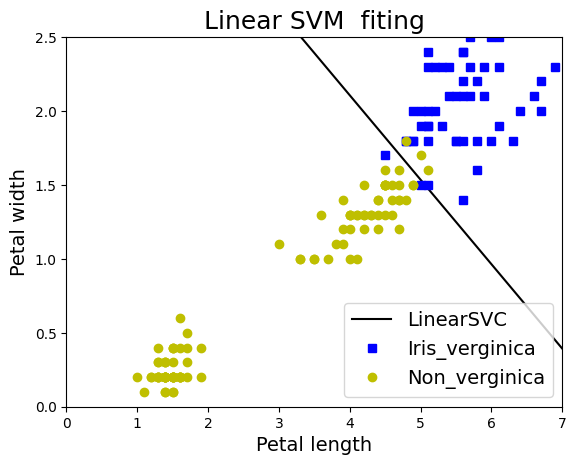

In [ ]:
plot_svc_decision_boundary(svm_clf50)

plt.plot(X[:,0][y==1],X[:,1][y==1],"bs", label= "Iris_verginica")
plt.plot(X[:,0][y==0],X[:,1][y==0],"yo", label= "Non_verginica")
plt.xlabel("Petal length", fontsize = 14)
plt.ylabel("Petal width", fontsize=14)

plt.legend(loc="lower right", fontsize=14)
plt.title("Linear SVM  fiting", fontsize = 18)
plt.axis([0,7,0,2.5])

plt.show()

#C가 100일때


In [ ]:
svm_clf100 = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=100, loss="hinge", random_state=42))
])

svm_clf100.fit(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc',
                 LinearSVC(C=100, loss='hinge', random_state=42))])

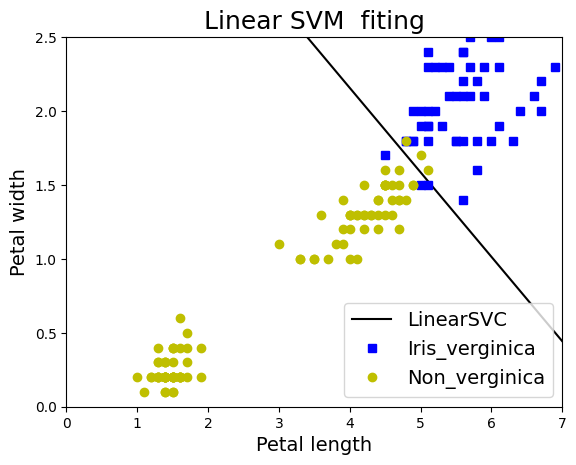

In [ ]:
plot_svc_decision_boundary(svm_clf100)

plt.plot(X[:,0][y==1],X[:,1][y==1],"bs", label= "Iris_verginica")
plt.plot(X[:,0][y==0],X[:,1][y==0],"yo", label= "Non_verginica")
plt.xlabel("Petal length", fontsize = 14)
plt.ylabel("Petal width", fontsize=14)

plt.legend(loc="lower right", fontsize=14)
plt.title("Linear SVM  fiting", fontsize = 18)
plt.axis([0,7,0,2.5])

plt.show()

#분석

C의 값이 커지면 커질 수록 기울기가 가파르게 나타났다. 서포트 벡터 머신에서 C값은 오류를 얼마나 허용할지를 나타내는 파라미터로, 그 값이 크면 클수록 오류를 덜 허용하며 하드 마진에 가까워진다.
C=50과 C=1을 비교하면 C=50에서는 iris_verginica와 non-verginica를 더 엄밀하게 구분하고 있는 것을 확인할 수 수 있다.

#2.make_moon 데이터셋을 이용하여 실습

C값과 gamma의 값에 따라 어떻게 분류가 진행되는지 확인한다.

Text(0, 0.5, 'Petal width')

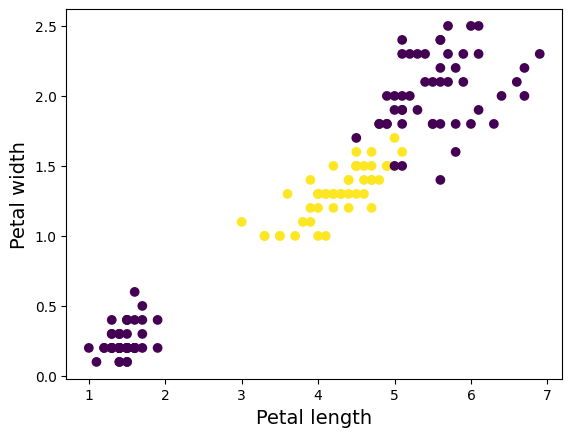

In [ ]:
X = iris['data'][:,(2,3)] #2~3인덱스. 꽃잎 길이와 꽃잎 너비의 데이터를 전부 가져온다
y = (iris['target']==1).astype(np.float64) #타겟값 변경



plt.figure()

plt.scatter(X[:,0], X[:,1], c=y) #모두 가져오는 중

plt.xlabel("Petal length", fontsize = 14)
plt.ylabel("Petal width", fontsize=14)

In [ ]:
def plot_dataset(X,y,axes):
  plt.plot(X[:,0][y==0],X[:,1][y==0],"bs")
  plt.plot(X[:,0][y==1],X[:,1][y==1],"g^")
  plt.axis(axes)
  plt.grid(True, which="both")
  plt.xlabel(r"$x_1$", fontsize=20)
  plt.ylabel(r"$x_2$", fontsize=20, rotation=0)


def plot_predictions(clf,axes):
  x0s = np.linspace(axes[0],axes[1],100)
  x1s = np.linspace(axes[2],axes[3],100)
  x0, x1 = np.meshgrid(x0s,x1s)
  X=np.c_[x0.ravel(),x1.ravel()]
  y_pred = clf.predict(X).reshape(x0.shape)
  y_decision = clf.decision_function(X).reshape(x0.shape)
  plt.contourf(x0,x1,y_pred,cmap=plt.cm.brg, alpha=0.2)
  plt.contourf(x0,x1,y_decision,cmap=plt.cm.brg, alpha=0.1)


#make moon 적용

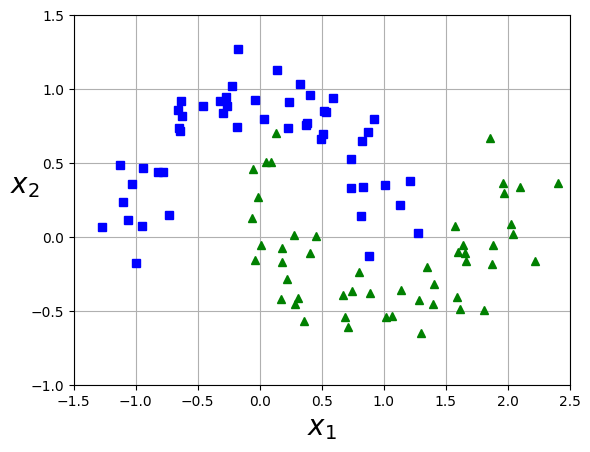

In [ ]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples = 100, noise=0.15,random_state=42)

plot_dataset(X,y, [-1.5,2.5,-1,1.5])
plt.show()

#gamma가 0.1 / C가 0.001

In [ ]:
from sklearn.svm import SVC

rbf_kernel_svm_clf_01_0001 = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=0.1, C=0.001))
])

rbf_kernel_svm_clf_01_0001.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=0.1))])

<function matplotlib.pyplot.show(close=None, block=None)>

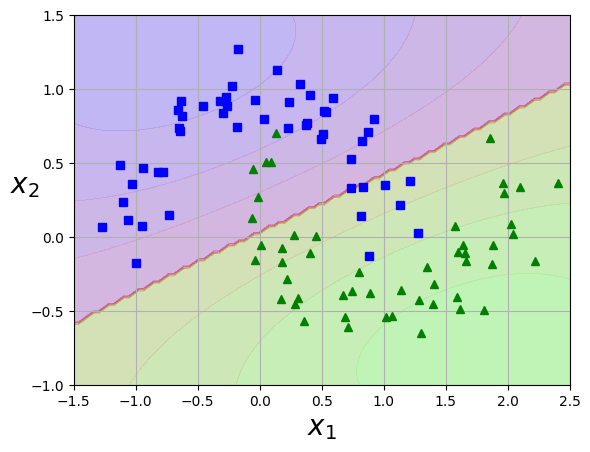

In [ ]:
plot_predictions(rbf_kernel_svm_clf_01_0001, [-1.5,2.5,-1,1.5])
plot_dataset(X,y,[-1.5,2.5,-1,1.5])

plt.show

감마와 C가 모두 작은 케이스에서는, 거의 직선의 형태로 나타나고 이상치에 대한 허용이 크게 보인다. 곡률도 거의 반영되지 않았음을 알 수 있다.

#gamma가 0.1 / C가 1000

In [ ]:
from sklearn.svm import SVC

rbf_kernel_svm_clf_01_1000 = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=0.1, C=1000))
])

rbf_kernel_svm_clf_01_1000.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=1000, gamma=0.1))])

<function matplotlib.pyplot.show(close=None, block=None)>

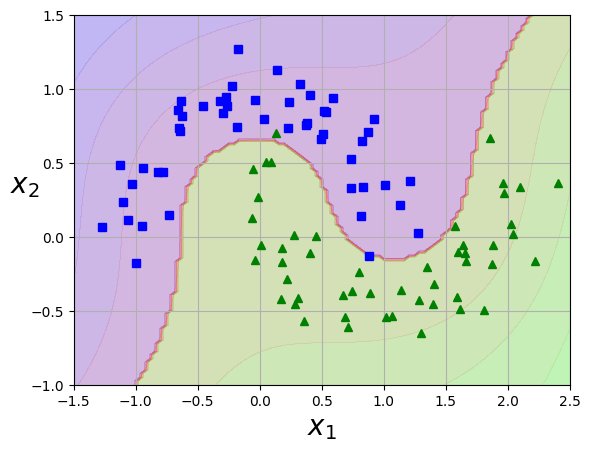

In [ ]:
plot_predictions(rbf_kernel_svm_clf_01_1000, [-1.5,2.5,-1,1.5])
plot_dataset(X,y,[-1.5,2.5,-1,1.5])

plt.show

C값을 크게 하자 이상치를 감지하고 분류하는 모습을 보인다. 이때, 아직 감마가 크지 않기 때문에 결정 경계 근처에 있는 값들에는 민감하게 반응하지는 않는다.

#gamma가 0.5/ C가 0.001

In [ ]:
rbf_kernel_svm_clf_05_0001 = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=0.5, C=0.001))
])

rbf_kernel_svm_clf_05_0001.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=0.5))])

<function matplotlib.pyplot.show(close=None, block=None)>

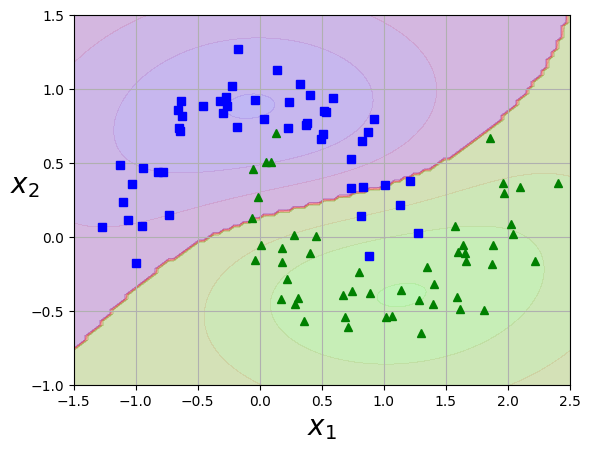

In [ ]:
plot_predictions(rbf_kernel_svm_clf_05_0001, [-1.5,2.5,-1,1.5])
plot_dataset(X,y,[-1.5,2.5,-1,1.5])

plt.show

gamma 값이 0.1일때와 비교해서 곡선이 생겼지만 여전히 거의 직선에 가까운 형태로 나타난다. C값이 작은 탓에 이상치를 많이 허용하고 있다.

#gamma가 0.5/C가 1000

In [ ]:
rbf_kernel_svm_clf_05_1000 = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=0.5, C=1000))
])

rbf_kernel_svm_clf_05_1000.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=1000, gamma=0.5))])

<function matplotlib.pyplot.show(close=None, block=None)>

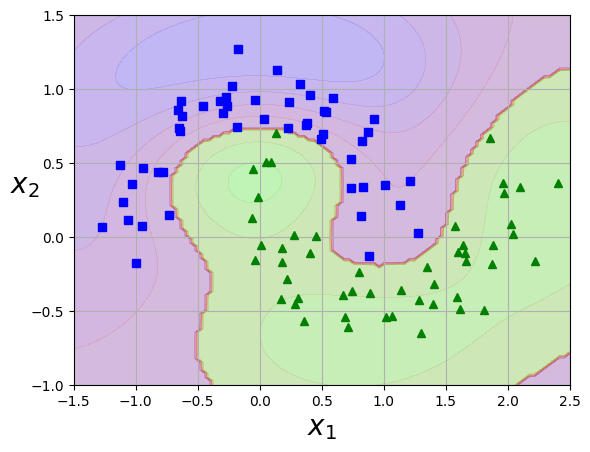

In [ ]:
plot_predictions(rbf_kernel_svm_clf_05_1000, [-1.5,2.5,-1,1.5])
plot_dataset(X,y,[-1.5,2.5,-1,1.5])

plt.show

C를 1000으로 설정하면 0.001에서보다 더 정교한 결정 경계를 만들어내는 것을 알 수 있다. 또한 곡률이 크게 설정되어 소용돌이 형태로 보인다.

#gamma가 5 / C가 0.001

In [ ]:
rbf_kernel_svm_clf_5_0001 = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
])

rbf_kernel_svm_clf_5_0001.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

<function matplotlib.pyplot.show(close=None, block=None)>

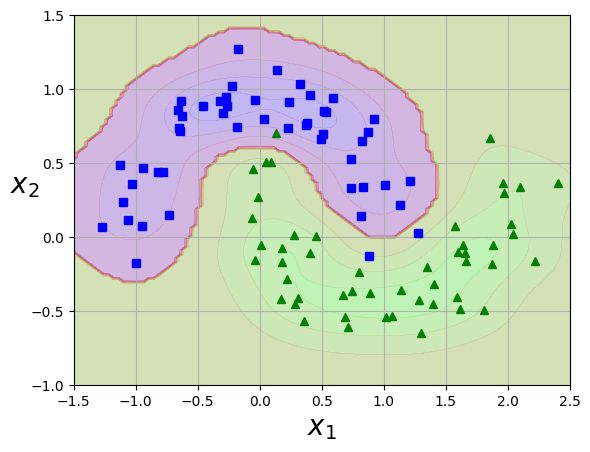

In [ ]:
plot_predictions(rbf_kernel_svm_clf_5_0001, [-1.5,2.5,-1,1.5])
plot_dataset(X,y,[-1.5,2.5,-1,1.5])

plt.show

gamma를 크게 늘리자 가까이에 있는 요소들을 크게 신경쓰는 것을 확인할 수 있었다. 그러나 C가 크지 않아 이상치를 명확하게 분류하지는 않고 있다.

#gamma가 5 / C가 1000

In [ ]:
from sklearn.svm import SVC

rbf_kernel_svm_clf_5_1000 = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=5, C=1000))
])

rbf_kernel_svm_clf_5_1000.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=1000, gamma=5))])

<function matplotlib.pyplot.show(close=None, block=None)>

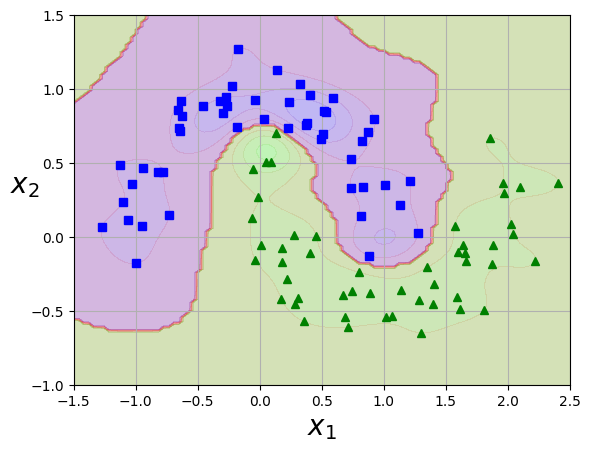

In [ ]:
plot_predictions(rbf_kernel_svm_clf_5_1000, [-1.5,2.5,-1,1.5])
plot_dataset(X,y,[-1.5,2.5,-1,1.5])

plt.show

gamma와 C모두 크게 준 상태로, 가까이에 있는 집단을 크게 고려하고 있으며 이상치를 강하게 고려하여 두 개의 집단을 명확하게 분류하고 있음을 알 수 있다.

#분석

gamma와 C 모두 크면 클 수록 집단을 더욱 정밀하게 분류하지만, 무턱대고 두 파라미터를 크게 설정하고 진행하는 분류는 실전에서 과적합의 문제를 일으킬 수 있음에 주의해야 한다.

커널 트릭을 적용한 SVM에서 gamma값은 가까이에 있는 집단에 얼마나 많은 영향력을 부여하는지, C는 이상치에 얼마나 민감하게 반응하여 곡률을 설정하는지를 정하는 파라미터로 작용한다. 이 파라미터를 너무 크지도 작지도 않게 설정하는 것이 좋은 학습의 관건이 될 것이다.